# EDA - Text Fields (Title and content)

## Load packages and separate data

In [1]:
#package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# load data
training_data = pd.read_json("train.json")

In [3]:
# isolate variables...
X_training_data = np.array(training_data.drop('requester_received_pizza', axis = 1))
print(X_training_data.shape)

# ...from labels
Y_training_data = np.array(training_data['requester_received_pizza'])
print(Y_training_data.shape)

(4040, 31)
(4040,)


In [4]:
print('Number of Pizzas in Training:', len(Y_training_data[Y_training_data == 1]))
print('Number of NO Pizzas in Training:', len(Y_training_data[Y_training_data == 0]))
print('Pizza Ratio =', len(Y_training_data[Y_training_data == 1])
                          / len(Y_training_data[Y_training_data == 0]))

Number of Pizzas in Training: 994
Number of NO Pizzas in Training: 3046
Pizza Ratio = 0.3263296126066973


## Title Data

In [5]:
x_training_data_title = np.array(training_data['request_title'])
print(x_training_data_title[0:10])

['Request Colorado Springs Help Us Please'
 '[Request] California, No cash and I could use some dinner'
 '[Request] Hungry couple in Dundee, Scotland would love some pizza!'
 '[Request] In Canada (Ontario), just got home from school. Need pizza.'
 '[Request] Old friend coming to visit. Would LOVE to feed her some dinner. Indiana'
 "[REQUEST] I'll give a two week xbox live code for a slice of pie!"
 '[Request] Help me give back to my roomies on Friday'
 'random acts of pizza, i have a request, if nothing, direct me to the correct sub please...'
 '[Request] Queensland Australia, Recently moved, little hungry :('
 "[REQUEST]We're in need of some om noms..."]


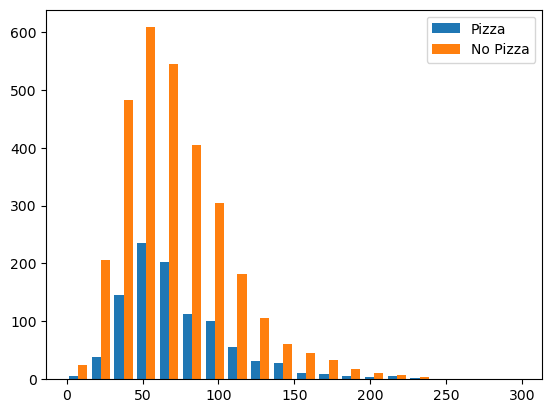

Shortest title - pizza: 7
Shortest title - no pizza: 7
Longest title - pizza: 250
Longest title - no pizza: 272
Average title length - pizza: 72.83702213279678
Average title length - no pizza: 71.5935653315824


In [6]:
# Create a list of lengths for training examples with a positive label.
title_lengths_pizza = [len(x) for (i, x) in enumerate(x_training_data_title) if Y_training_data[i]]

# And a list of lengths for training examples with a negative label.
title_lengths_no_pizza = [len(x) for (i, x) in enumerate(x_training_data_title) if not Y_training_data[i]]

# The histogram function can take a list of inputs and corresponding labels.
plt.hist([title_lengths_pizza, title_lengths_no_pizza], bins=20, range=(0, 300),
         label=['Pizza', 'No Pizza'])
plt.legend()
plt.show()

# Check shortest, longest, and average title length
print('Shortest title - pizza:', min(title_lengths_pizza))
print('Shortest title - no pizza:', min(title_lengths_no_pizza))
print('Longest title - pizza:', max(title_lengths_pizza))
print('Longest title - no pizza:', max(title_lengths_no_pizza))
print('Average title length - pizza:', np.mean(title_lengths_pizza))
print('Average title length - no pizza:', np.mean(title_lengths_no_pizza))

In [7]:
# isolate pizza titles
titles_pizza = [x for (i, x) in enumerate(x_training_data_title) if Y_training_data[i]]

# isolate non pizza titles
titles_no_pizza = [x for (i, x) in enumerate(x_training_data_title) if not Y_training_data[i]]

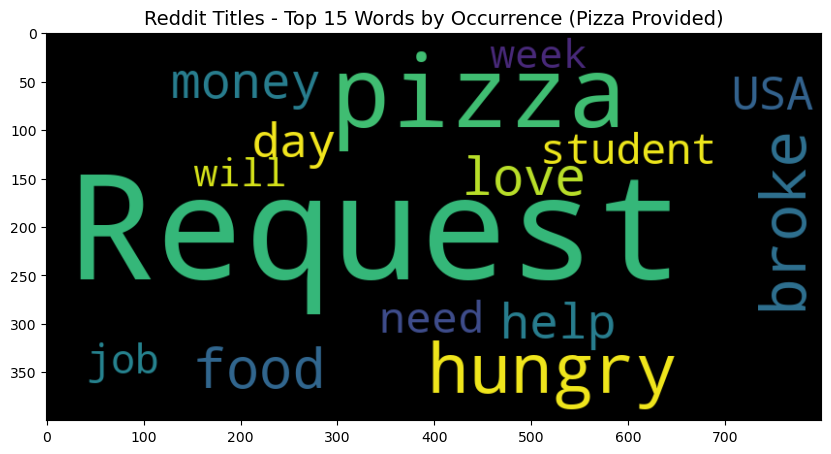

In [8]:
plt.figure(figsize = (10,10))
wc = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(titles_pizza))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Reddit Titles - Top 15 Words by Occurrence (Pizza Provided)',fontsize=14);

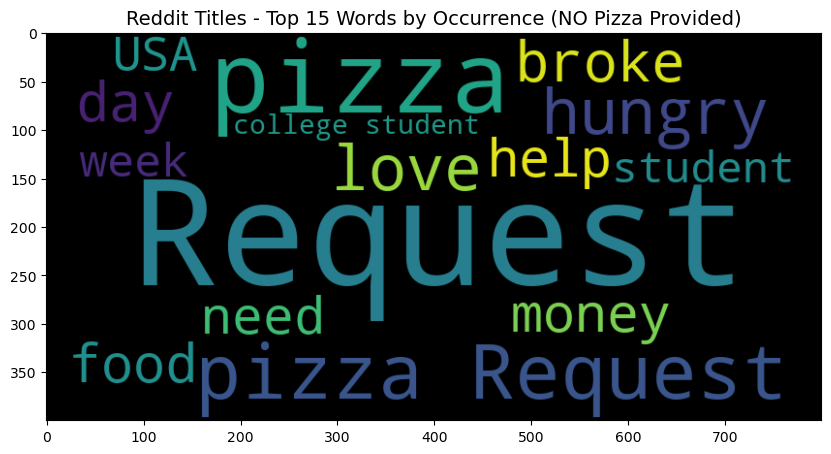

In [9]:
plt.figure(figsize = (10,10))
wc = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(titles_no_pizza))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Reddit Titles - Top 15 Words by Occurrence (NO Pizza Provided)',fontsize=14);

## Post data

In [10]:
x_training_data_post = np.array(training_data['request_text'])
print(x_training_data_post[10:])

["I've been unemployed but working odd jobs. I worked a job yesterday which I thought paid up front - it did not. Now I'm sitting at home dreaming of pizza (literally, I took a nap and dreamt there was pizza in my fridge, but woke up to nothing but leftover pasta). Will pay forward when I get a chance!"
 "Been a lurker for some time, figured I'd give it a shot. Nothing special about me. Just moved to San Francisco and don't know many people, so I figured I'd just stay in tonight and hope for some cheesy goodness. :)"
 "I am a stay at home mom of two kids i live with my husband his parents and my kids! The only reason that I am unemployed is because my husband was hit by a drunk driver a little over a year ago and was seriously injured and was almost killed! so i quit work to help him through recovery and take care of the kids while living with my in-laws off of their ssi checks (which are tiny)! Its the end of the month and we're broke! We are not starving but we aren't eating all that

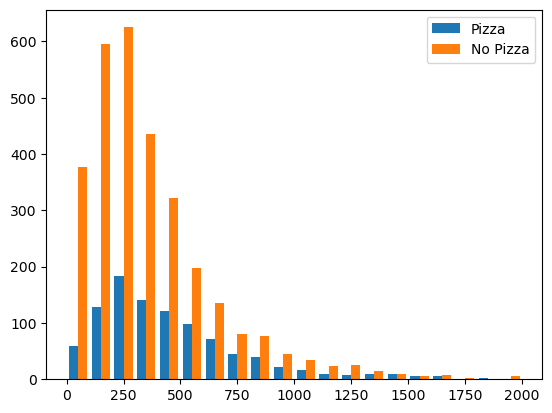

Shortest post - pizza: 0
Shortest post - no pizza: 0
Longest post - pizza: 4293
Longest post - no pizza: 4460
Average post length - pizza: 487.7354124748491
Average post length - no pizza: 378.3237032173342


In [11]:
## taken from HW9

# Create a list of lengths for training examples with a positive label.
text_lengths_pizza = [len(x) for (i, x) in enumerate(x_training_data_post) if Y_training_data[i]]

# And a list of lengths for training examples with a negative label.
text_lengths_no_pizza = [len(x) for (i, x) in enumerate(x_training_data_post) if not Y_training_data[i]]

# The histogram function can take a list of inputs and corresponding labels.
plt.hist([text_lengths_pizza, text_lengths_no_pizza], bins=20, range=(0, 2000),
         label=['Pizza', 'No Pizza'])
plt.legend()
plt.show()

# Also check the longest reviews.
print('Shortest post - pizza:', min(text_lengths_pizza))
print('Shortest post - no pizza:', min(text_lengths_no_pizza))
print('Longest post - pizza:', max(text_lengths_pizza))
print('Longest post - no pizza:', max(text_lengths_no_pizza))
print('Average post length - pizza:', np.mean(text_lengths_pizza))
print('Average post length - no pizza:', np.mean(text_lengths_no_pizza))

In [12]:
# isolate pizza posts
posts_pizza = [x for (i, x) in enumerate(x_training_data_post) if Y_training_data[i]]

# isolate non pizza posts
posts_no_pizza = [x for (i, x) in enumerate(x_training_data_post) if not Y_training_data[i]]

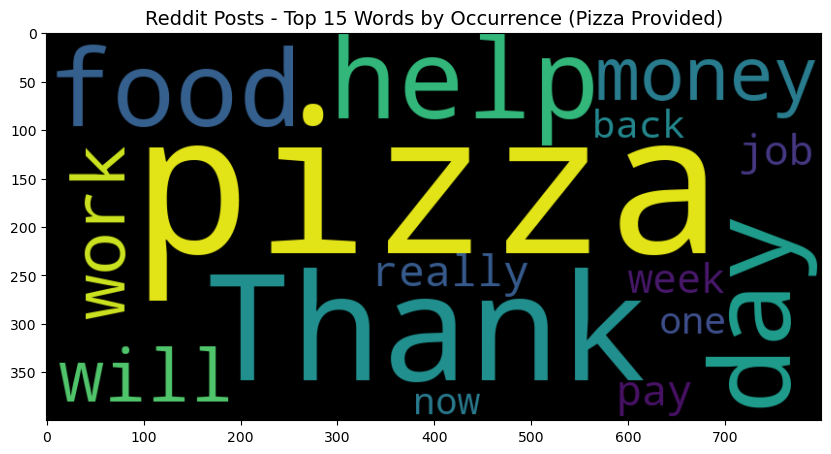

In [13]:
plt.figure(figsize = (10,10))
wc = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(posts_pizza))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Reddit Posts - Top 15 Words by Occurrence (Pizza Provided)',fontsize=14);

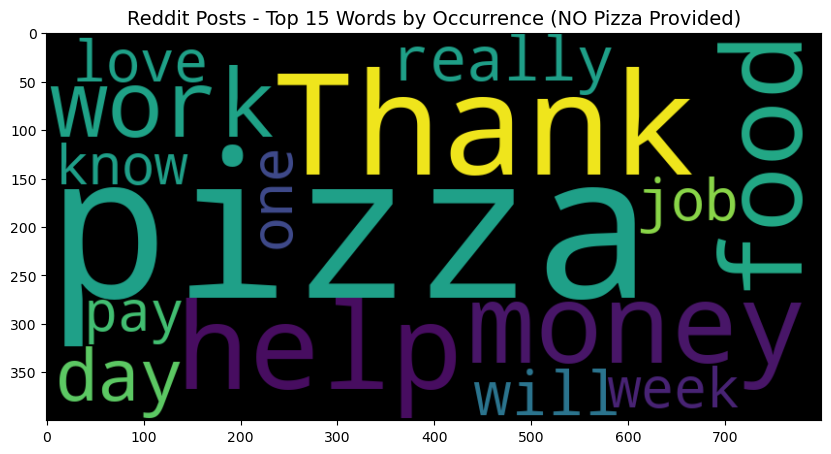

In [14]:
plt.figure(figsize = (10,10))
wc = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(posts_no_pizza))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Reddit Posts - Top 15 Words by Occurrence (NO Pizza Provided)',fontsize=14);

# Start looking at building our vocabulary to plot

In [15]:
import tensorflow_datasets as tfds
from collections import Counter
import tensorflow as tf

In [16]:
x_training_data_post_df = pd.DataFrame(x_training_data_post)
type(x_training_data_post_df)

pandas.core.frame.DataFrame

In [17]:
type(x_training_data_post)

numpy.ndarray

In [18]:
try:
    tokenizer = tfds.features.text.Tokenizer()
except AttributeError:
    tokenizer = tfds.deprecated.text.Tokenizer()

# create an instance of the Counter class
token_counts = Counter()

for example in x_training_data_post:
    tokens = tokenizer.tokenize(str(example))
    token_counts.update(tokens)
    
print('Size of training vocabulary:', len(token_counts))

Size of training vocabulary: 14900


In [19]:
# look at posts

print('Print second post in training data:')
print('------')
for idx, example in enumerate(x_training_data_post[:2]):
    if idx == 1:
        print(example)
        tokens = tokenizer.tokenize(str(example))

print('\nPrinting the first 10 tokens:')
print('------')
tokens = tokenizer.tokenize(str(x_training_data_post[0]))
[val for idx, val in enumerate(tokens) if idx < 12]


Print second post in training data:
------
I spent the last money I had on gas today. Im broke until next Thursday :(

Printing the first 10 tokens:
------


['Hi',
 'I',
 'am',
 'in',
 'need',
 'of',
 'food',
 'for',
 'my',
 '4',
 'children',
 'we']

In [20]:
# create an instance of the TF encoder class
try:
    encoder = tfds.features.text.TokenTextEncoder(token_counts) # token_counts contains our training vocabulary
except AttributeError:
    encoder = tfds.deprecated.text.TokenTextEncoder(token_counts)

# try an example first (first 12 characters from the second review in training data)
example_str = 'I spent the last money I had on gas today. Im broke until next Thursday :('
encoder.encode(example_str) # the encode method transforms the text into integers

[2, 56, 57, 58, 59, 2, 60, 61, 62, 63, 64, 65, 66, 67, 68]